# NLP 2025
# Lab 2: Word Vectors and Information Retrieval

During the first few weeks, we discussed various ways to represent text 📝. One key question was: What should be the basic unit of representation? Words are the fundamental building blocks 🧱.

In this lab, we will explore different text representation models, such as Bag-of-Words (BoW), TF-IDF and word embeddings 🔤➡️🔢. Among these, word embeddings are the most effective in terms of performance. They represent each word as a vector of numbers, where each vector captures the meaning of the word 🧠📊.

These numerical representations (or weights) are learned using machine learning models 🤖. We’ll dive deeper into how these vectors are learned in the next lecture 📚.

For now, we’ll focus on how different representation methods affect performance in an information retrieval task 🔍.

By the end of this lab, you should be able to:

+ 🧼🔁 Implement and/or use built-in functions to preprocess your data (once again!)
+ 🧱👜 Build a Bag-of-Words representation of the dataset
+ 📊✨ Implement TF-IDF
+ 📥🔤 Load pre-trained word embeddings
+ 🔍🧠 Inspect and test word embedding properties
+ 🗣️➡️📐 Use word embeddings to get sentence representations (aka sentence embeddings)
+ 🧩🔎 Use sentence embeddings to solve more complex tasks like information retrieval
+ 🧪📏 Design evaluation frameworks for specific NLP tasks and assess their difficulty

### Score breakdown

| Exercise            | Points |
|---------------------|--------|
| [Exercise 1](#e1)   | 1      |
| [Exercise 2](#e2)   | 1      |
| [Exercise 3](#e3)   | 1      |
| [Exercise 4](#e4)   | 1      |
| [Exercise 5](#e5)   | 1      |
| [Exercise 6](#e6)   | 2      |
| [Exercise 7](#e7)   | 10     |
| [Exercise 8](#e8)   | 5      |
| [Exercise 9](#e9)   | 15     |
| [Exercise 10](#e10) | 10     |
| [Exercise 11](#e11) | 10     |
| [Exercise 12](#e12) | 5      |
| [Exercise 13](#e13) | 15     |
| [Exercise 14](#e14) | 3      |
| [Exercise 15](#e15) | 10     |
| [Exercise 16](#e16) | 10     |
| Total               | 100    |

This score will be scaled down to 1 and that will be your final lab score.

### 📌 **Instructions for Delivery** (📅 **Deadline: 18/Apr 18:00**, 🎭 *wildcards possible*)

✅ **Submission Requirements**
+ 📄 You need to submit a **PDF of your report** (use the templates provided in **LaTeX** 🖋️ (*preferred*) or **Word** 📑) and a **copy of your notebook** 📓 with the code.
+ ⚡ Make sure that **all cells are executed properly** ⚙️ and that **all figures/results/plots** 📊 you include in the report are also visible in your **executed notebook**.

✅ **Collaboration & Integrity**
+ 🗣️ While you may **discuss** the lab with others, you must **write your solutions with your group only**. If you **discuss specific tasks** with others, please **include their names** in the appendix of the report.
+ 📜 **Honor Code applies** to this lab. For more details, check **Syllabus §7.2** ⚖️.
+ 📢 **Mandatory Disclosure**:
   - Any **websites** 🌐 (e.g., **Stack Overflow** 💡) or **other resources** used must be **listed and disclosed**.
   - Any **GenAI tools** 🤖 (e.g., **ChatGPT**) used must be **explicitly mentioned**.
   - 🚨 **Failure to disclose these resources is a violation of academic integrity**. See **Syllabus §7.3** for details.

## 0. Setup

As in the last lab, we will be using huggingface datasets library ([https://huggingface.co/datasets](https://huggingface.co/datasets)). You can find the detailed documentation and tutorials here: [https://huggingface.co/docs/datasets/en/index](https://huggingface.co/docs/datasets/en/index)

If you don't have it installed you can run the code below or install it via `pip` in your terminal. If you are using Google Colab, you can uncomment and run the code below in a code cell. Restarting of the runtime may be required after installation (Runtime/Restart session).

Previously installed datasets library version of 3.2.0 had an error when combined with numpy version >2. If you encounter an error at some point it might require to update the datasets library to the newer version. You can do that by running the code below. If you are using Google Colab, you can run the code below in a code cell. If you are using Jupyter Notebook, you can run the code below in a code cell or in a terminal.

In [1]:
# ! pip install -U datasets~=3.5.0
# ! pip install -U gensim
# ! python -m pip install -U matplotlib
# ! pip install nltk
# ! pip install -U scikit-learn
# ! pip install --upgrade --force-reinstall datasets

In [2]:
#  create a virtual environment - and activate it - and dowloand correct versions of dependecies
# ! python3 -m venv env
# ! source env/bin/activate
# ! pip install -U datasets~=3.5.0
# ! pip install -U gensim
# ! python -m pip install -U matplotlib
# ! pip install nltk
# ! pip install -U scikit-learn
# ! pip install --upgrade --force-reinstall datasets

As usual, we start by importing some essential Python libraries and we will be using. Apart from `gensim` (which is going to be used for word embeddings), we have already seen the others.

In [92]:
import re

import numpy as np
import matplotlib.pyplot as plt
import datasets
from datasets import DatasetDict

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

import nltk
nltk.download('punkt_tab')

import tqdm
import gensim

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/maksiuuuuuuu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


p## 1. Load and Preprocess Data

*Sentence compression* involves rephrasing sentences to make them shorter while still retaining the original meaning. A reliable compression system would be valuable for mobile devices and could also serve as a component in an extractive summarization system.

The dataset we are going to use can be found on [Huggingface](https://huggingface.co/datasets/embedding-data/sentence-compression). It concerns a set of 180,000 pairs of sentences, aka it is a parallel corpus of sentences and their equivalent compressions. It has been collected by harvesting news articles from the Internet where the headline appears to be similar to the first sentence and that property is used to find an "extractive" compression of the sentence.

For example, for the sentence

`"Regulators Friday shut down a small Florida bank, bringing to 119 the number of US bank failures this year amid mounting loan defaults"`

the compressed equivalent (based on the dataset) is:

`"Regulators shut down small Florida bank"`.


For more information you can read the original paper (from Google) [here](https://aclanthology.org/D13-1155.pdf). We strongly recommend going over the paper to gain further insights. Notice that the paper is from 2013, therefore word embeddings have not been widely introduced yet in NLP tasks, meaning that the methods applied were based on the traditional NLP pipeline (feature extraction + ML).

### 1.1 Loading the Dataset

The dataset will be loaded as a Pandas DataFrame. This may take a few minutes because of the large size of the data.

Make sure to inspect the dataset and make sure it is imported properly.

In [93]:
ds = datasets.load_dataset('embedding-data/sentence-compression')
print(ds)

DatasetDict({
    train: Dataset({
        features: ['set'],
        num_rows: 180000
    })
})


In [94]:
for i in range(100):
    print(ds['train'][i])

{'set': ["The USHL completed an expansion draft on Monday as 10 players who were on the rosters of USHL teams during the 2009-10 season were selected by the League's two newest entries, the Muskegon Lumberjacks and Dubuque Fighting Saints.", 'USHL completes expansion draft']}
{'set': ['Major League Baseball Commissioner Bud Selig will be speaking at St. Norbert College next month.', 'Bud Selig to speak at St. Norbert College']}
{'set': ["It's fresh cherry time in Michigan and the best time to enjoy this delicious and nutritious fruit.", "It's cherry time"]}
{'set': ['An Evesham man is facing charges in Pennsylvania after he allegedly dragged his girlfriend from the side of his pickup truck on the campus of Kutztown University in the early morning hours of Dec. 5, police said.', 'Evesham man faces charges for Pa.']}
{'set': ["NRT LLC, one of the nation's largest residential real estate brokerage companies, announced several executive appointments within its Coldwell Banker Residential B

The dataset comes with only the `train` split so we will have to split it ourselves.

In [95]:
split_ds = ds['train'].train_test_split(test_size=0.2)
split_ds_2 = DatasetDict(split_ds)
print(split_ds)

DatasetDict({
    train: Dataset({
        features: ['set'],
        num_rows: 144000
    })
    test: Dataset({
        features: ['set'],
        num_rows: 36000
    })
})


### 1.2 Preprocessing the dataset
In this section we will prepare the dataset, aka clean the sentences and tokenize.

First, let's write the function to clean the text. It can be similar to the one from the previous lab (Lab1) but make sure that it makes sense for this dataset and task.

More specifically, think about lower-casing, punctuation, stop-words and lemmatization/stemming and the impact it might have on the dataset. Also reflect on the fact that with word embeddings we want to uncover semantic relationships between words, whereas with bag-of-words we were trying to capture different morphological variations.

<a name='e1'></a>
### Exercise 1: Clean function
(1p) Fill in the following function to clean the dataset. Implement at least 3 different steps.

In [96]:
def clean(text):
    """
    Cleans the given text
    Args:
        text: a str with the text to clean

    Returns: a str with the cleaned text

    """

    # Empty text
    if text == '':
        return text

    # 'text' from the example can be of type numpy.str_, let's convert it to a python str
    text = str(text)

    #you might need more
    #add them here

    ### YOUR CODE HERE

    text = re.sub(r'\'s', '', text)
    text = re.sub(r"\`\`", '', text)
    text = re.sub(r"\'\'", '', text)
    text = re.sub(r"\'", '', text)
    text = re.sub(r'\,', '', text)
    text = re.sub(r'\-', ' ', text)
    text = re.sub(r'(?<!\d)\.(?!\d)', '', text)

    # replace contractions (a bit extensive)
    text = text.replace("’", "'").replace("‘", "'").replace("“", '"').replace("”", '"')
    text = re.sub(r"\b(what|who|where|when|why|how|there|it|here|she|he|that)\'s\b", r"\1 is", text, flags=re.IGNORECASE)
    text = re.sub(r"\'re\b", " are", text, flags=re.IGNORECASE)
    text = re.sub(r"\'ve\b", " have", text, flags=re.IGNORECASE)
    text = re.sub(r"\'ll\b", " will", text, flags=re.IGNORECASE)
    text = re.sub(r"\'d\b", " would", text, flags=re.IGNORECASE)
    text = re.sub(r"can\'t\b", "can not", text, flags=re.IGNORECASE)
    text = re.sub(r"won\'t\b", "will not", text, flags=re.IGNORECASE)
    text = re.sub(r"n\'t\b", " not", text, flags=re.IGNORECASE)

    # remove stop words
    stopwords = ['a','i','the','in','of','for','at','to','on','with','from','that','he','she','it','is','by','as','an','what','his','her','they',
                 'those','these','its','was','has','and','will','have','had','has','be','are','because','since','however','this','their','who',
                 'whom']
    stopword_pattern = re.compile(rf"\b({'|'.join(map(re.escape, stopwords))})\b", re.IGNORECASE)
    text = stopword_pattern.sub('', text)

    # Space out punctuation
    text = re.sub(r'([^\w\s])', r' \1 ', text)

    text = re.sub(r'\d', r' \g<0> ', text)

    # remove repeated spaces
    text = re.sub(r'\s+', ' ', text)

    ### YOUR CODE ENDS HERE

    text = text.strip()

    # Update the example with the cleaned text
    return text

The following function will apply the function (sic) you just wrote to the whole dataset. More specifically, it takes the first entry (`sentence`) from the set of uncompressed/compressed pairs, applies the `clean` function and saves the processed sentence in the field `clean_sentence`. The same is dome for the compressed version of the sentence (saved as `clean_compressed`).

In [97]:
def clean_dataset(example):
    """
    Cleans the sentence and compressed sentence in the example from the Dataset
    Args:
        example: an example from the Dataset

    Returns: updated example with 'clean_sentence' and 'clean_compressed' cleaned

    """
    sentence, compressed = example['set']
    clean_sentence = clean(sentence)
    clean_compressed = clean(compressed)
    example['clean_sentence'] = clean_sentence
    example['clean_compressed'] = clean_compressed
    return example

Below we apply the function to the whole dataset (using `map`) and we can also inspect the result.

In [98]:
split_ds = split_ds.map(clean_dataset)
print(split_ds)


Map: 100%|██████████| 36000/36000 [00:02<00:00, 12475.35 examples/s]

DatasetDict({
    train: Dataset({
        features: ['set', 'clean_sentence', 'clean_compressed'],
        num_rows: 144000
    })
    test: Dataset({
        features: ['set', 'clean_sentence', 'clean_compressed'],
        num_rows: 36000
    })
})


In [99]:
for i in range(10):
    print(split_ds['train'][i])

for i in range(10):
    print(split_ds['train'][i]['clean_compressed'])

{'set': ['A Manchester paramedic has been accused of sexually assaulting a patient in the back of an ambulance.', 'Paramedic accused of assaulting patient'], 'clean_sentence': 'Manchester paramedic been accused sexually assaulting patient back ambulance', 'clean_compressed': 'Paramedic accused assaulting patient'}
{'set': ['France has recalled its ambassador to Syria for consultations, the foreign ministry in Paris announced on Tuesday.', 'France recalls ambassador to Syria'], 'clean_sentence': 'France recalled ambassador Syria consultations foreign ministry Paris announced Tuesday', 'clean_compressed': 'France recalls ambassador Syria'}
{'set': ['THE median price of renting in Sydney has hit $500 a week for the first time, an industry report has revealed.', 'Median price of renting in Sydney has hit $500 a week for the first time'], 'clean_sentence': 'median price renting Sydney hit $ 5 0 0 week first time industry report revealed', 'clean_compressed': 'Median price renting Sydney hit

Let's examine some examples from the dataset and make sure that we got the results we wanted. At this step, it might be necessary to revisit some pre-processing steps if you are not happy with the results.

In [100]:
for i in range(10):
    print(split_ds['train'][i])

{'set': ['A Manchester paramedic has been accused of sexually assaulting a patient in the back of an ambulance.', 'Paramedic accused of assaulting patient'], 'clean_sentence': 'Manchester paramedic been accused sexually assaulting patient back ambulance', 'clean_compressed': 'Paramedic accused assaulting patient'}
{'set': ['France has recalled its ambassador to Syria for consultations, the foreign ministry in Paris announced on Tuesday.', 'France recalls ambassador to Syria'], 'clean_sentence': 'France recalled ambassador Syria consultations foreign ministry Paris announced Tuesday', 'clean_compressed': 'France recalls ambassador Syria'}
{'set': ['THE median price of renting in Sydney has hit $500 a week for the first time, an industry report has revealed.', 'Median price of renting in Sydney has hit $500 a week for the first time'], 'clean_sentence': 'median price renting Sydney hit $ 5 0 0 week first time industry report revealed', 'clean_compressed': 'Median price renting Sydney hit

<a name='e2'></a>
### Exercise 2: Tokenize function

(1p) As always, we will need to tokenize the dataset in order to create bat-of-words and TF-IDF representations in the next sections. We will use the [Natural Language Toolkit (NLTK) library]([https://www.nltk.org/]) (https://www.nltk.org/). Complete the following function to split the text into tokens using the `word_tokenize()` function. Check the [documentation](https://www.nltk.org/api/nltk.tokenize.word_tokenize.html?highlight=word_tokenize) first.
Note that there are different tokenizers e.g. `RegexpTokenizer` where you can enter your own regexp, `WhitespaceTokenizer` (similar to Python's string.split()) and `BlanklineTokenizer`.

In [101]:
def tokenize(text):
    """
    Tokenizes the `text` parameter using nltk library
    Args:
        text: a string representing a sentence to be tokenized

    Returns: a list of tokens (strings)

    """

    ### YOUR CODE HERE

    tokens = nltk.tokenize.word_tokenize(text, language='english', preserve_line=False)

    ### YOUR CODE ENDS HERE
    return tokens

Next, the function will be applied to the whole dataset (as we did with the pre-processing) and `sentence_tokens` field will be created to store the result.

In [102]:
def tokenize_dataset(example):
    """
    Tokenizes 'clean_sentence' columns in the example from the Dataset
    Args:
        example: an example from the Dataset

    Returns: updated example with 'sentence_tokens' columns

    """
    example['sentence_tokens'] = tokenize(example['clean_sentence'])
    example['compressed_tokens'] = tokenize(example['clean_compressed'])
    return example

In [103]:
split_ds = split_ds.map(tokenize_dataset)

Map: 100%|██████████| 36000/36000 [00:02<00:00, 17368.88 examples/s]


In [104]:
for i in range(30):
    print(split_ds['train'][i])


{'set': ['A Manchester paramedic has been accused of sexually assaulting a patient in the back of an ambulance.', 'Paramedic accused of assaulting patient'], 'clean_sentence': 'Manchester paramedic been accused sexually assaulting patient back ambulance', 'clean_compressed': 'Paramedic accused assaulting patient', 'sentence_tokens': ['Manchester', 'paramedic', 'been', 'accused', 'sexually', 'assaulting', 'patient', 'back', 'ambulance'], 'compressed_tokens': ['Paramedic', 'accused', 'assaulting', 'patient']}
{'set': ['France has recalled its ambassador to Syria for consultations, the foreign ministry in Paris announced on Tuesday.', 'France recalls ambassador to Syria'], 'clean_sentence': 'France recalled ambassador Syria consultations foreign ministry Paris announced Tuesday', 'clean_compressed': 'France recalls ambassador Syria', 'sentence_tokens': ['France', 'recalled', 'ambassador', 'Syria', 'consultations', 'foreign', 'ministry', 'Paris', 'announced', 'Tuesday'], 'compressed_tokens

Since we will need the tokenized sentences, we can use the following statement to extract them from the `train` split of our dataset.

In [105]:
tokenized_sentences = split_ds['train']['sentence_tokens']
print(len(tokenized_sentences))
print(tokenized_sentences[:10])

144000
[['Manchester', 'paramedic', 'been', 'accused', 'sexually', 'assaulting', 'patient', 'back', 'ambulance'], ['France', 'recalled', 'ambassador', 'Syria', 'consultations', 'foreign', 'ministry', 'Paris', 'announced', 'Tuesday'], ['median', 'price', 'renting', 'Sydney', 'hit', '$', '5', '0', '0', 'week', 'first', 'time', 'industry', 'report', 'revealed'], ['Consumer', 'confidence', 'already', 'decade', 'low', 'March', 'quarter', 'plunged', 'further', 'June', 'quarter', 'lowest', 'recession', '1', '9', '9', '1', 'according', 'Westpac', 'McDermott', 'Miller', 'survey'], ['There', 'always', 'been', 'popular', 'applications', 'iPhone', 'platform', 'seem', 'take', 'age', 'become', 'available', 'users', 'Google', 'popular', 'OS', 'today', 'we', 'news', 'Vine', 'iOS', 'app', 'gets', 'major', 'update', 'while', 'Android', 'still', 'waits'], ['Hitachi', 'announced', 'received', 'FDA', 'clearance', 'Echelon', 'Oval', '1', '.', '5', 'T', 'Ultra', 'Wide', 'MR', 'system', 'according', 'news', '

In [106]:
tokenized_compressed = split_ds['train']['compressed_tokens']
print(len(tokenized_compressed))
print(tokenized_compressed[:10])

144000
[['Paramedic', 'accused', 'assaulting', 'patient'], ['France', 'recalls', 'ambassador', 'Syria'], ['Median', 'price', 'renting', 'Sydney', 'hit', '$', '5', '0', '0', 'week', 'first', 'time'], ['Consumer', 'confidence', 'plunges', 'lowest', '1', '9', '9', '1'], ['Vine', 'iOS', 'gets', 'major', 'update', 'while', 'Android', 'still', 'waits'], ['Hitachi', 'receives', 'FDA', 'clearance', 'Echelon', 'Oval', 'MR', 'system'], ['Camp', 'fire', 'sparks', 'Wairarapa', 'blaze'], ['Ian', 'McKellen', 'marrying', 'Patrick', 'Stewart', '!'], ['National', 'holiday', 'road', 'toll', 'rises', '6', '5'], ['Woonsocket', 'drug', 'dealer', 'pleads', 'guilty']]


Notice the difference in the types of the different structures we use. Run the following cell to check the types. Do they make sense to you?

In [107]:
#type of original dataset
print(type(split_ds))
print("--")
#type of original sentence
print(split_ds['train'][1])
print(type(split_ds['train'][1]))
print("--")
#type of pre-proceesed sentence
print(split_ds['train']['clean_sentence'][1])
print(type(split_ds['train']['clean_sentence'][1]))
print("--")
#type of tokenized sentence
print(split_ds['train']['sentence_tokens'][1])
print(type(split_ds['train']['sentence_tokens'][1]))
print("--")

<class 'datasets.dataset_dict.DatasetDict'>
--
{'set': ['France has recalled its ambassador to Syria for consultations, the foreign ministry in Paris announced on Tuesday.', 'France recalls ambassador to Syria'], 'clean_sentence': 'France recalled ambassador Syria consultations foreign ministry Paris announced Tuesday', 'clean_compressed': 'France recalls ambassador Syria', 'sentence_tokens': ['France', 'recalled', 'ambassador', 'Syria', 'consultations', 'foreign', 'ministry', 'Paris', 'announced', 'Tuesday'], 'compressed_tokens': ['France', 'recalls', 'ambassador', 'Syria']}
<class 'dict'>
--
France recalled ambassador Syria consultations foreign ministry Paris announced Tuesday
<class 'str'>
--
['France', 'recalled', 'ambassador', 'Syria', 'consultations', 'foreign', 'ministry', 'Paris', 'announced', 'Tuesday']
<class 'list'>
--


## 2. Bag of Words
In this section you will built a bag-of-words representation of the dataset. We will use numpy arrays to store the results. The bag-of-words representation is a simple and effective way to represent text data. It involves creating a vocabulary of unique words from the dataset and representing each sentence as a vector of word counts. We first need the vocabulary, which we will build from both the full sentences and the compressed sentences. Similar to the first lab, the vocabulary will be a list of unique words from the dataset.

<a name='e3'></a>
### Exercise 3: Extracting vocabulary counts

(1p) In the following cell, you will implement a function that takes a list of tokenized sentences and returns a dictionary with the counts of each word in the vocabulary. The dictionary should be of the form {word: count}. As in previous lab, you will use the `Counter` class from the `collections` module to do this.

In [108]:
from collections import Counter


def extract_vocabulary_counts(tokenized_sentences):
    """
    Extracts the vocabulary from the tokenized sentences
    Args:
        tokenized_sentences: a list of lists of tokens

    Returns: a Counter object with the counts of each word in the vocabulary
    """

    ### YOUR CODE HERE

    vocab = Counter()
    for sentence in tokenized_sentences:
        vocab.update(sentence)
    return vocab


    ### YOUR CODE ENDS HERE

In [109]:
vocab_counter = extract_vocabulary_counts(tokenized_sentences + tokenized_compressed)
print(len(vocab_counter))
print(vocab_counter.most_common(20))

115669
[('0', 67391), ('1', 50091), ('2', 41660), ('said', 19903), ('5', 19878), ('3', 19362), ('after', 18575), ('4', 15136), ('.', 15060), (':', 13936), ('new', 13793), ('6', 12192), ('7', 11927), ('8', 11798), ('year', 11764), ('9', 11713), ('US', 11424), ('been', 10635), ('$', 9766), ('today', 9701)]


As you can see the size of the vocabulary is quite large. Like the last time, we will limit the vocabulary to the most frequent words. The next cell will create a dictionary that maps each word to an index in the vocabulary. This will be used to create the bag-of-words representation of the sentences.

In [110]:
vocab_size = 10_000
vocab = vocab_counter.most_common(vocab_size)
token_to_id = {word: i for i, (word, _) in enumerate(vocab)}
print(token_to_id)

{'0': 0, '1': 1, '2': 2, 'said': 3, '5': 4, '3': 5, 'after': 6, '4': 7, '.': 8, ':': 9, 'new': 10, '6': 11, '7': 12, '8': 13, 'year': 14, '9': 15, 'US': 16, 'been': 17, '$': 18, 'today': 19, 'man': 20, 'over': 21, 'first': 22, 'up': 23, 'announced': 24, 'two': 25, 'Tuesday': 26, 'not': 27, 'Wednesday': 28, 'Thursday': 29, 'Monday': 30, 'against': 31, 'police': 32, 'Friday': 33, 'out': 34, 'more': 35, 'says': 36, 'New': 37, 'into': 38, 'million': 39, 'were': 40, 'which': 41, 'according': 42, 'one': 43, 'last': 44, 'Saturday': 45, 'week': 46, 'than': 47, 'County': 48, 'President': 49, 'about': 50, 'Sunday': 51, 'years': 52, 'India': 53, 'time': 54, 'off': 55, 'during': 56, 'old': 57, 'home': 58, 'three': 59, 'state': 60, 'people': 61, 'but': 62, 'night': 63, 'government': 64, 'killed': 65, 'company': 66, 'when': 67, 'woman': 68, 'being': 69, 'found': 70, 'next': 71, 'arrested': 72, 'all': 73, 'second': 74, 'died': 75, 'morning': 76, 'Minister': 77, 'set': 78, 'Obama': 79, 'charged': 80, 

<a name='e4'></a>
### Exercise 4: Bag of Words
(1p) Here we will create the bag-of-words representation of the sentences. The function will take a single sentence (list of tokens) and return an array of size `vocab_size` with the counts of each word in the vocabulary. The
`vocab_size` is calculated as the length of the passed `token_to_id` dictionary. The resulting array should have zeros everywhere but the indices corresponding to the words in the vocabulary where it should have the counts of the words in the sentence. For example, if the sentence is `['fox', 'and', 'deer']` and the vocabulary is `{'fox': 0, 'and': 1, 'deer': 2}`, the resulting array should be `[1, 1, 1]`. If the sentence is `['fox', 'and', 'fox', 'deer']`, the resulting array should be `[2, 1, 1]`.

In [111]:
def bag_of_words(sentence, token_to_id):
    """
    Creates a bag-of-words representation of the sentence
    Args:
        sentence: a list of tokens
        token_to_id: a dictionary mapping each word to an index in the vocabulary

    Returns:: a numpy array of size vocab_size with the counts of each word in the vocabulary

    """
    vocab_size = len(token_to_id)
    bow = np.zeros(vocab_size, dtype=int)

    ### YOUR CODE HERE

    for token in sentence:
        if token in token_to_id:
            bow[token_to_id[token]] += 1

    ### YOUR CODE ENDS HERE

    return bow

Let's see how the function works on a single sentence. The output should be a numpy array of size `vocab_size` with the counts of each word in the vocabulary.

In [112]:
print('Tokenized sentence:')
print(tokenized_sentences[0])
sentence_bow = bag_of_words(tokenized_sentences[0], token_to_id)

print('Bag of words:')
print(sentence_bow)
print('Type of bag of words:')
print(type(sentence_bow))
print('Shape of bag of words:')
print(sentence_bow.shape)
print('Non-zero elements in bag of words:')
print(np.nonzero(sentence_bow)[0])

Tokenized sentence:
['Manchester', 'paramedic', 'been', 'accused', 'sexually', 'assaulting', 'patient', 'back', 'ambulance']
Bag of words:
[0 0 0 ... 0 0 0]
Type of bag of words:
<class 'numpy.ndarray'>
Shape of bag of words:
(10000,)
Non-zero elements in bag of words:
[  17   83  166  677 1861 2256 2601 5201]


We can also check in detail what words and their counts are in the bag-of-words representation.

In [113]:
sentence_non_zero_bow = np.nonzero(sentence_bow)[0]
print('Non-zero elements in bag of words:')
print(sentence_non_zero_bow)
for i in sentence_non_zero_bow:
    print(vocab[i][0], ':', sentence_bow[i])

Non-zero elements in bag of words:
[  17   83  166  677 1861 2256 2601 5201]
been : 1
back : 1
accused : 1
Manchester : 1
sexually : 1
assaulting : 1
patient : 1
ambulance : 1


The following function will apply all the steps we implemented to a single sentence. It returns a bag of words representation that we will use to calculate the similarity between different sentences.

In [114]:
def embed_text(text, clean_fn, tokenize_fn, embed_fn):
    cleaned = clean_fn(text)
    tokens = tokenize_fn(cleaned)
    embedding = embed_fn(tokens)
    return embedding

<a name='e5'></a>
### Exercise 5: Cosine Similarity between two vectors

(1p) Complete the following function that given any two vectors will compute the cosine similarity. If you don't remember the formula for the cosine similarity, revisit the course material. Notice that the function receives numpy arrays and recall that you can express cosine similarity as a dot product. Use numpy functions to write an efficient implementation.

In [115]:
def cosine_similarity(vector1, vector2):
    """
    Computes the cosine similarity between two vectors
    Args:
        vector1: numpy array of the first vector
        vector2: numpy array of the second vector

    Returns: cosine similarity

    """
    ### YOUR CODE HERE

    cosine = np.dot(vector1, vector2)/(np.linalg.norm(vector1) * np.linalg.norm(vector2))
    return cosine

    ### YOUR CODE ENDS HERE

In [116]:
cosine_similarity(np.array([0, 1, 2]), np.array([0, 2, 4]))

0.9999999999999998

In [117]:
sentences = [
    'The quick brown fox jumps over the lazy dog.',
    'Some interesting document containing sentences.',
    'The quick brown fox jumps over the lazy cat and some other stuff.',
    'Fox and deer are not friends.',
    'fox and deer',
    'Fox and deer are not friends. But this document is a lot longer than the previous one. We can add sentence by sentence and see how the embeddings change.',
]
embedded_sentences = [
    embed_text(sentence, clean, tokenize, lambda x: bag_of_words(x, token_to_id))
    for sentence in sentences
]

query = 'fox and deer'
embedded_query = embed_text(query, clean, tokenize, lambda x: bag_of_words(x, token_to_id))

cosine_similarities = [
    cosine_similarity(embedded_query, embedded_sentence)
    for embedded_sentence in embedded_sentences
]
print(f'Query: {query}')
for sent, cos_sim in zip(sentences, cosine_similarities):
    print(f'Cosine Similarity: {cos_sim:.4f} - Sentence: {sent}')


sent = tokenize('The quick brown fox jumps over the lazy dog.')
vec = bag_of_words(sent, token_to_id)
vec2 = bag_of_words(query, token_to_id)
print(cosine_similarity(vec, vec2))
print('fox' in token_to_id)

Query: fox and deer
Cosine Similarity: 0.0000 - Sentence: The quick brown fox jumps over the lazy dog.
Cosine Similarity: 0.0000 - Sentence: Some interesting document containing sentences.
Cosine Similarity: 0.0000 - Sentence: The quick brown fox jumps over the lazy cat and some other stuff.
Cosine Similarity: 0.5000 - Sentence: Fox and deer are not friends.
Cosine Similarity: 1.0000 - Sentence: fox and deer
Cosine Similarity: 0.2182 - Sentence: Fox and deer are not friends. But this document is a lot longer than the previous one. We can add sentence by sentence and see how the embeddings change.
0.0
False


We will apply the function to the whole dataset. This might take a while, so be patient. The result will be stored in the `sentence_bow` and `compressed_bow` fields of the dataset.

In [118]:
def bag_of_words_dataset(example):
    """
    Creates a bag-of-words representation of the sentence and compressed sentence in the example from the Dataset
    Args:
        example: an example from the Dataset

    Returns: updated example with 'sentence_bow' and 'compressed_bow' columns

    """
    sentence_tokens = example['sentence_tokens']
    compressed_tokens = example['compressed_tokens']

    sentence_bow = bag_of_words(sentence_tokens, token_to_id)
    compressed_bow = bag_of_words(compressed_tokens, token_to_id)

    example['sentence_bow'] = sentence_bow
    example['compressed_bow'] = compressed_bow
    return example

The following cell will apply the function to the whole dataset. The result will be stored in the `sentence_bow` and `compressed_bow` fields of the dataset. We will also convert the dataset's fields `sentence_bow` and `compressed_bow` to numpy format for easier manipulation.

In [119]:
test_ds = split_ds['test'].map(bag_of_words_dataset)
test_ds = test_ds.with_format('np', columns=['sentence_bow', 'compressed_bow'], dtype=float)
print(test_ds)

Map:   3%|▎         | 1000/36000 [00:00<00:06, 5155.70 examples/s]

Map: 100%|██████████| 36000/36000 [00:06<00:00, 5872.56 examples/s]

Dataset({
    features: ['set', 'clean_sentence', 'clean_compressed', 'sentence_tokens', 'compressed_tokens', 'sentence_bow', 'compressed_bow'],
    num_rows: 36000
})


Let's check the results. The `sentence_bow` and `compressed_bow` fields should contain the bag-of-words representation of the sentences and compressed sentences, respectively.

In [120]:
print(test_ds[0])

{'sentence_bow': array([0., 2., 1., ..., 0., 0., 0.]), 'compressed_bow': array([0., 0., 1., ..., 0., 0., 0.])}


In [121]:
sentences_bows = test_ds['sentence_bow']
print(sentences_bows.shape)

(36000, 10000)


Now we can start building a retriever based on the bag of words representation. The first step is to calculate the cosine similarity between two vectors.

<a name='e6'></a>
### Exercise 6: Cosine Similarity between a vector and an array of vectors

(2p) The next step in our retrieval system, would be to calculate the proximity of a query to our retrieval corpus (in our case that is all the sentences).

Complete the following function to calculate the cosine similarity between a vector (first parameter `vector`, that will usually be the query vector) and all other vectors (second parameter `other_vectors`, that will be the sentence embeddings in our case). Note that the `other_vectors` parameter is a single numpy array of size `N x D`, where $N$ is the number of vectors and $D$ is the dimension of each vector.

For maximum efficiency (we will need it) do not use loops. Try to write the implementation with numpy functions. Hint: matrix multiplication can be seen as calculating the dot product between rows and columns of the multiplied matrices.

In [122]:
def cosine_similarity_1_to_n(vector, other_vectors):
    """
    Calculates the cosine similarity between a single vector and other vectors.
    Args:
        vector: a numpy array representing a vector of D dimensions
        other_vectors: a 2D numpy array representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a 1D numpy array of size N containing the cosine similarity between the vector and all the other vectors

    """

    #### YOUR CODE HERE 

    matrix_multiplication = other_vectors @ vector
    norms = np.linalg.norm(other_vectors, axis=1) * np.linalg.norm(vector)
    return matrix_multiplication / (norms+1e-10) # divide by 0 error

    ### YOUR CODE ENDS HERE

We will use the function to calculate the similarity of all sentences in the dataset to our query.

In [123]:
query = 'fox and deer'
embedded_query = embed_text(query, clean, tokenize, lambda x: bag_of_words(x, token_to_id))

In [124]:
query_similarity = cosine_similarity_1_to_n(embedded_query, sentences_bows)
print(query_similarity.shape)
print(query_similarity[:10])
# matrix =  sentences_bows @ embedded_query
# print(matrix[6471])
print(query_similarity[29034])

(36000,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0


In [125]:
print(tokenized_sentences[3])

['Consumer', 'confidence', 'already', 'decade', 'low', 'March', 'quarter', 'plunged', 'further', 'June', 'quarter', 'lowest', 'recession', '1', '9', '9', '1', 'according', 'Westpac', 'McDermott', 'Miller', 'survey']


The following cell will select the most similar sentence.

In [126]:
most_similar = int(np.argmax(query_similarity))
print(most_similar)
print(query_similarity[most_similar])
print(split_ds['test'][most_similar]['set'][0])
# print("Dot product:", np.dot(embedded_query, sentences_bows[6471]))
# print("Query norm:", np.linalg.norm(embedded_query))
# print("Target norm:", np.linalg.norm(sentences_bows[6471]))
# print("Expected cosine:", np.dot(embedded_query, sentences_bows[6471]) /
#                           (np.linalg.norm(embedded_query) * np.linalg.norm(sentences_bows[6471])))
# print("Actual cosine:", query_similarity[6471])


13485
0.3333333333222222
What time of the day is best for hunting deer during a full moon?


The following function will return the indices of the top-k elements in the array.

In [127]:
def top_k_indices(array, k, sorted=True):
    """
    Returns top-k indices from the 1D array. If `sorted` is `True` the returned indices are sorted in the descending order
    Args:
        array: a 1D numpy array
        k: a number of top indices to return
        sorted: if True, the returned indices are sorted in descending order

    Returns: a 1D array containing top-k indices

    """
    top_k = np.argpartition(array, -k)[-k:]
    if sorted:
        selected = array[top_k]
        sorted_selected = (-selected).argsort()
        top_k = top_k[sorted_selected]
    return top_k

In [128]:
top_indices = top_k_indices(query_similarity, k=10).tolist()
for idx in top_indices:
    print(split_ds['test'][idx]['set'][0])
    print(f'similarity: {query_similarity[idx]}')
    # print(len(split_ds['test'][idx]['sentence_tokens']))
    # print(idx)
    # print(f'similarity: {query_similarity[idx]}')

What time of the day is best for hunting deer during a full moon?
similarity: 0.3333333333222222
On Friday, high school students from Eveleth Gilbert spent the day collecting deer ticks.
similarity: 0.3333333333222222
Actor Kyle Chandler rescued a newborn deer after he found it caught up in a cactus patch on his Texas ranch.
similarity: 0.2886751345864796
At least three Wisconsin hunters have died of natural causes since the weekend opening of the state's gun-deer hunt.
similarity: 0.2773500981049223
Officials say a deer jumped through the window of a Saginaw County consignment store, leaving behind broken glass and spattered blood.
similarity: 0.2773500981049223
A 70-year-old Clinton Township man sitting in his home was shot in the abdomen Thursday by a stray shotgun slug fired by a hunter shooting at a deer.
similarity: 0.25819888974049443
Plum Creek officials acknowledged Monday that they mistakenly logged part of a deer wintering area in Indian Stream Township but are now taking st

<a name='e7'></a>
### Exercise 7: Analyzing and improving BOW search results

Experiment with different queries (taking into account the nature of the dataset and your insights from the analysis so far).
Answer the following questions:
- (5p) Does the search perform well? When does it fail? Discuss several examples that are we get an expected but also unexpected results (find at least 3 from each category). Provide reasons for the good/bad result in each case (e.g. is there some error in the data, is there some linguistic phenomenon that we don't capture, is something wrong with our modeling with average embeddings, ...)
- (5p) If you see problems with search, how could you improve your implementation? Change the functions above, if you think there is room for improvement. Describe your changes and how they made the search better or (in case you made no changes) explain what made the search robust enough to work well.

In [129]:
#### YOUR CODE HERE
import gc

# made shitty version with stop words

def clean2(text):
    # Empty text
    if text == '':
        return text

    # 'text' from the example can be of type numpy.str_, let's convert it to a python str
    text = str(text)

    text = re.sub(r'\'s', '', text)
    text = re.sub(r"\`\`", '"', text)
    text = re.sub(r"\'\'", '"', text)
    text = re.sub(r"\'", '"', text)
    text = re.sub(r'\,', '', text)
    text = re.sub(r'\-', ' ', text)
    text = re.sub(r'(?<!\d)\.(?!\d)', '', text)

    # replace contractions (a bit extensive)
    text = text.replace("’", "'").replace("‘", "'").replace("“", '"').replace("”", '"')
    text = re.sub(r"\b(what|who|where|when|why|how|there|it|here|she|he|that)\'s\b", r"\1 is", text, flags=re.IGNORECASE)
    text = re.sub(r"\'re\b", " are", text, flags=re.IGNORECASE)
    text = re.sub(r"\'ve\b", " have", text, flags=re.IGNORECASE)
    text = re.sub(r"\'ll\b", " will", text, flags=re.IGNORECASE)
    text = re.sub(r"\'d\b", " would", text, flags=re.IGNORECASE)
    text = re.sub(r"can\'t\b", "can not", text, flags=re.IGNORECASE)
    text = re.sub(r"won\'t\b", "will not", text, flags=re.IGNORECASE)
    text = re.sub(r"n\'t\b", " not", text, flags=re.IGNORECASE)

    # Space out punctuation
    text = re.sub(r'(?<!\d)([.,:;!?])(?!\d)', r' \1 ', text)

    # remove repeated spaces
    text = re.sub(r'\s+', ' ', text)

    text = text.strip()
    return text

def clean_dataset_2(example):
    sentence, compressed = example['set']
    clean_sentence = clean2(sentence)
    clean_compressed = clean2(compressed)
    example['clean_sentence'] = clean_sentence
    example['clean_compressed'] = clean_compressed
    return example

def bag_of_words_dataset_2(example):
    sentence_tokens = example['sentence_tokens']
    compressed_tokens = example['compressed_tokens']

    sentence_bow = bag_of_words(sentence_tokens, token_to_id_2)
    compressed_bow = bag_of_words(compressed_tokens, token_to_id_2)

    example['sentence_bow'] = sentence_bow
    example['compressed_bow'] = compressed_bow
    return example


# recreating shit

split_ds_2 = split_ds_2.map(clean_dataset_2)
print(split_ds_2['train'][0]['clean_sentence'])  # from new cleaning
print(split_ds['train'][0]['clean_sentence'])    # from old cleaning

split_ds_2 = split_ds_2.map(tokenize_dataset)


tokenized_compressed_2 = split_ds_2['train']['compressed_tokens']
tokenized_sentences_2 = split_ds_2['train']['sentence_tokens']
vocab_counter_2 = extract_vocabulary_counts(tokenized_sentences_2 + tokenized_compressed_2)
vocab_2 = vocab_counter_2.most_common(10000)
token_to_id_2 = {word: i for i, (word, _) in enumerate(vocab_2)}
test_ds_2 = split_ds_2['test'].map(bag_of_words_dataset_2)
test_ds_2 = test_ds_2.with_format('np', columns=['sentence_bow', 'compressed_bow'], dtype=float)



Map: 100%|██████████| 36000/36000 [00:01<00:00, 23553.75 examples/s]


A Manchester paramedic has been accused of sexually assaulting a patient in the back of an ambulance
Manchester paramedic been accused sexually assaulting patient back ambulance


Map: 100%|██████████| 36000/36000 [00:06<00:00, 5334.25 examples/s]


In [130]:
test_ds_2

Dataset({
    features: ['set', 'clean_sentence', 'clean_compressed', 'sentence_tokens', 'compressed_tokens', 'sentence_bow', 'compressed_bow'],
    num_rows: 36000
})

In [131]:
sentences_bows2 = test_ds_2['sentence_bow']
print(sentences_bows2)


query2 = 'deer children US 130'
embedded_query2 = embed_text(query2, clean2, tokenize, lambda x: bag_of_words(x, token_to_id_2))

query_similarity2 = cosine_similarity_1_to_n(embedded_query2, sentences_bows2)

top_indices2 = top_k_indices(query_similarity2, k=10).tolist()
for idx in top_indices2:
    print(split_ds_2['test'][idx]['set'][0])
    print(f'similarity: {query_similarity2[idx]}')




### YOUR CODE ENDS HERE

[[2. 1. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [3. 1. 0. ... 0. 0. 0.]
 ...
 [0. 2. 0. ... 0. 0. 0.]
 [2. 1. 1. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]]
A first of its kind study compared US and European children and found that US children take much more drugs than their European peers do.
similarity: 0.34815531190836535
Russia is threatening to ban Americans from adopting Russian children in retaliation for a new US law that forbids Russian officials accused of human rights abuses from travelling to the US.
similarity: 0.2535462764164121
The US Senate has unanimously confirmed Tim Roemer as the next US Ambassador to India.
similarity: 0.249999999996875
With an estimated 1.25 million children across southern Somalia in urgent need of life-saving care and 640,000 children acutely malnourished, UNICEF calls for all actors to make saving children's lives the top priority and to urgently support all efforts to reach children in need.
similarity: 0.24433888871111792
The US House voted Tu

 matching stop words and punctuation, so system generally matches based off of stop words, meaning that doc returned has almost zero relevance
 as a result works well if the query contains no stop words

 if you want to stress certain words more than others like 'deer', repeating them in the query will weight it more resulting more relevant search, because repetition increases overlap count and thus increases cosine similarity.

 doesn't work well if the query contains punctuation like "", and the search will match texts with as many "" as possible, same with stop words

 if the query contains only out of vocab words like 'fox' the search will obviously fail, all cosine similarities will be 0 the search doesn't account for semantic similarity

 this is a bit of a repetition of the stop word point, but even if we exclude them, search is still obviously dominated by more frequent words in the documents, the more common a word is, and the more it is repeated in a doc the more likely it is that search will match mostly based off of that words take the query; 'happy deer children US' since US is one of the more common words the search will prioritise texts that mention US, although it is probably better if it were to match as many words as possible (without changing the current search too drastically otherwise there are much better search algorithms)

 Two docs with equal overlap can score differently, shorter ones rank higher. Cosine similarity divides by vector length (L2 norm),
 biasing scores toward shorter docs when using binary vectors.

 improvements would generally be better cleaning such as; exclude stop words, punctuation, digit separation - best would be to probably stem or lemmatize but it is too tedious for this, the running time is not fast enough to make it worth. Apart from better cleaning, to better match queries rather than matching based off of frequency it makes more sense to match as many words from the doc as possible, for the reasons mentioned above.

## 3. Term Frequency - Inverse Document Frequency (TF-IDF)

In this section we will implement the TF-IDF algorithm. While BOW is a simple way to represent the documents, it has some limitations. For example, it does not take into account the importance of each word in the document. TF-IDF representation takes into account the frequency of each word in the document and the frequency of the word in the whole dataset. It is a widely used technique in information retrieval and text mining. Refer to the lecture slides for more details.

<a name='e8'></a>
### Exercise 8: Inverse Document Frequency (IDF)
(5p) In this exercise, you will implement the TF-IDF algorithm. First, calculate Inverse Document Frequency (IDF) for each word in the vocabulary. Intuitively, it is a measure of how informative a word is based on the whole dataset. Consult the lecture slides for the details. The IDF is calculated as follows:
$$
IDF(t) = log_{10}(N/df(t))$$
where $N$ is the total number of documents (sentences) in the dataset and $df(t)$ is the number of documents containing the word $t$.


In [132]:
def calculate_idf(bows):
    """
    Calculates the IDF for each word in the vocabulary
    Args:
        bows: numpy array of size (N x D) where N is the number of documents and D is the vocabulary size

    Returns: a numpy array of size D with IDF values for each token
    """

    ### YOUR CODE HERE

    N = bows.shape[0]
    df = np.count_nonzero(bows > 0, axis=0)
    idf = np.log(N /(df+1)) # df+1 divide by 0 issues)

    return idf

    ### YOUR CODE ENDS HERE

idf = calculate_idf(sentences_bows)

<a name='e9'></a>
### Exercise 9: TF-IDF
- (5p) Calculate TF-IDF on the `test` subset of the dataset.
- (5p) Analyze the search results based on your implemented TF-IDF. Does the search perform well? When does it fail? Discuss several examples that are we get an expected but also unexpected results (find at least 3 from each category). Provide reasons for the good/bad result in each case (e.g. is there some error in the data, is there some linguistic phenomenon that we don't capture, is something wrong with our modeling with average embeddings, ...)
- (5p) Compare the results with the ones you got with the bag-of-words representation. Discuss the differences and similarities. Do you think TF-IDF is a better representation for this task? Why or why not? Provide examples to support your arguments.


In [ ]:
tfidf_bows = sentences_bows2 * idf

def TFIDF_dataset(example):
    sentence_bow = example['sentence_bow']
    compressed_bow = example['compressed_bow']

    sentence_tfidf = sentence_bow * idf
    compressed_tfidf = compressed_bow * idf

    example['sentence_tfidf'] = sentence_tfidf
    example['compressed_tfidf'] = compressed_tfidf
    return example

# calculate tfidf for the test dataset
test_ds_2 = test_ds_2.map(TFIDF_dataset)

def bag_of_words2(sentence, token_to_id):
    vocab_size = len(token_to_id)
    bow = np.zeros(vocab_size, dtype=int)

    for token in sentence:
        if token in token_to_id:
            bow[token_to_id[token]] += 1

    return bow

query3 = 'fox and deer'
query3 = 'US diplomat'

embedded_query = embed_text(query3, clean, tokenize, lambda x: bag_of_words2(x, token_to_id_2))

similarity_tfidf = cosine_similarity_1_to_n(embedded_query,tfidf_bows)


top_indices3 = top_k_indices(similarity_tfidf, k=10).tolist()
for idx in top_indices3:
    print(split_ds_2['test'][idx]['set'][0])
    print(f'similarity: {similarity_tfidf[idx]}')


Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

Nicholas Burns, a key US policymaker on Iran and India and the number three US diplomat, has decided to retire for personal reasons, US Secretary of State Condoleezza Rice said on Friday.
similarity: 0.4927921456932793
US crude oil futures jumped US$2.41 to settle at US$79.87.
similarity: 0.37391085566243515
Venezuela cuts contact with a top US diplomat over accusations that Washington is plotting to destabilize the country.
similarity: 0.36265571051714773
A senior Chinese diplomat says President Hu Jintao will call for new talks on North Korea when he makes a state visit to the US next week.
similarity: 0.3189896409714119
US gold futures refreshed record high Monday on expectations of a sharp US interest rate cut and further US dollar weakness.
similarity: 0.3162336608830348
Veteran diplomat Ranjan Mathai took over as India's new foreign secretary on Monday.
similarity: 0.31455734141166547
Despite an approximate gain of US$600/ton in spot ethylene prices in the US since the beginning 

// your comments

## 4. Word Embeddings

In this section you will load the pre-trained word embeddings model - Glove. You can read more about it [here](https://aclanthology.org/D14-1162/) ([https://aclanthology.org/D14-1162/](https://aclanthology.org/D14-1162/)). The embeddings are trained on a large corpus of text and are available in different dimensions. We will start with the dimension of 100, but later you will be asked to experiment with other dimensions.
Gensim library maintains a storage containing some pre-trained models. You can read more about it [here](https://github.com/piskvorky/gensim-data) ([https://github.com/piskvorky/gensim-data](https://github.com/piskvorky/gensim-data)). Be sure to read the README of this repository.

Let's first load the info of what models are available.

In [134]:
import json
import gensim.downloader as api

info = api.info()  # show info about available models/datasets
print(json.dumps(info['models'], indent=10))

{
          "fasttext-wiki-news-subwords-300": {
                    "num_records": 999999,
                    "file_size": 1005007116,
                    "base_dataset": "Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens)",
                    "reader_code": "https://github.com/RaRe-Technologies/gensim-data/releases/download/fasttext-wiki-news-subwords-300/__init__.py",
                    "license": "https://creativecommons.org/licenses/by-sa/3.0/",
                    "parameters": {
                              "dimension": 300
                    },
                    "description": "1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens).",
                    "read_more": [
                              "https://fasttext.cc/docs/en/english-vectors.html",
                              "https://arxiv.org/abs/1712.09405",
                              "https://arxiv.org/abs/1607.01759"
            

In [135]:
glove_model = api.load("glove-wiki-gigaword-100")

We can use the loaded model's `key_to_index` attribute to retrieve the whole vocabulary (aka for how many words we learned embeddings for).

In [136]:
vocab = list(glove_model.key_to_index)
print(len(vocab))

400000


Let's explore a bit further the embeddings. In the following cells, the embedding of a single word is returned. Double-check the dimensions (as sanity check). This is like inspecting the `W` matrix (weights) that we discussed in the lecture.

In [137]:
# vector of a particular model. note that it is 100 dimensional as specified.
glove_model['what']

array([-1.5180e-01,  3.8409e-01,  8.9340e-01, -4.2421e-01, -9.2161e-01,
        3.7988e-02, -3.2026e-01,  3.4119e-03,  2.2101e-01, -2.2045e-01,
        1.6661e-01,  2.1956e-01,  2.5325e-01, -2.9267e-01,  1.0171e-01,
       -7.5491e-02, -6.0406e-02,  2.8194e-01, -5.8519e-01,  4.8271e-01,
        1.7504e-02, -1.2086e-01, -1.0990e-01, -6.9554e-01,  1.5600e-01,
        7.0558e-02, -1.5058e-01, -8.1811e-01, -1.8535e-01, -3.6863e-01,
        3.1650e-02,  7.6616e-01,  8.4041e-02,  2.6928e-03, -2.7440e-01,
        2.1815e-01, -3.5157e-02,  3.2569e-01,  1.0032e-01, -6.0932e-01,
       -7.0316e-01,  1.8299e-01,  3.3134e-01, -1.2416e-01, -9.0542e-01,
       -3.9157e-02,  4.4719e-01, -5.7338e-01, -4.0172e-01, -8.2234e-01,
        5.5740e-01,  1.5101e-01,  2.4598e-01,  1.0113e+00, -4.6626e-01,
       -2.7133e+00,  4.3273e-01, -1.6314e-01,  1.5828e+00,  5.5081e-01,
       -2.4738e-01,  1.4184e+00, -1.6867e-02, -1.9368e-01,  1.0090e+00,
       -5.9864e-02,  9.1853e-01,  4.3022e-01, -2.0624e-01,  7.61

Gensim objects offers different methods to easily run very common tasks. For example, there are different functions to find the most similar words.

Check the documentation on how [`most_similar`](https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html) and [`similar_by_word`](https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.similar_by_word.html) can be used.

In [138]:
# most similar words to a given word
print(glove_model.most_similar('what', topn=10))

# also u can use
print(glove_model.similar_by_word('miss', topn=5))

[('how', 0.930321455001831), ('why', 0.9196362495422363), ('fact', 0.9069437980651855), ('know', 0.8876389861106873), ('that', 0.8810365796089172), ('think', 0.8772969841957092), ('so', 0.8753098249435425), ('even', 0.8751895427703857), ('something', 0.874744176864624), ('if', 0.8702542781829834)]
[('play', 0.6266525387763977), ('missed', 0.608065128326416), ('she', 0.596325695514679), ('chance', 0.5839369297027588), ('tournament', 0.5722586512565613)]


In [139]:
print(glove_model.most_similar('why', topn=10))

[('know', 0.9440940618515015), ('what', 0.9196362495422363), ('think', 0.9086559414863586), ('how', 0.9020735621452332), ('tell', 0.8923122882843018), ("n't", 0.8890628814697266), ('sure', 0.8870969414710999), ('thought', 0.8747684955596924), ('believe', 0.8745115995407104), ('say', 0.8730074763298035)]


In [140]:
print(glove_model.similar_by_word('who', topn=5))

[('whom', 0.8642492890357971), ('he', 0.8201969861984253), ('whose', 0.8143677711486816), ('had', 0.8035845160484314), ('others', 0.7708419561386108)]


We can now compare our implementation with the one in the pre-trained model and confirm what we already expected.

In [141]:
# simalarity between two words
word1 = 'alive'
word2 = 'biology'
print(glove_model.similarity(word1, word2))
print(cosine_similarity(glove_model[word1], glove_model[word2]))

0.15712574
0.15712576


In [142]:
# simalarity between two words. similar words
word1 = 'alive'
word2 = 'life'
print(glove_model.similarity(word1, word2))
print(cosine_similarity(glove_model[word1], glove_model[word2]))

0.6400604
0.6400604


In [143]:
# simalarity between two words. dissimilar words
word1 = 'alive'
word2 = 'dead'
print(glove_model.similarity(word1, word2))
print(cosine_similarity(glove_model[word1], glove_model[word2]))

0.71035177
0.71035177


In [144]:
# simalarity between two words. unrelated words
word1 = 'alive'
word2 = 'horse'
print(glove_model.similarity(word1, word2))
print(cosine_similarity(glove_model[word1], glove_model[word2]))

0.34625494
0.34625494


In [145]:
# simalarity between two SAME words
glove_model.similarity('equal', 'equal')
word1 = 'equal'
word2 = 'equal'
print(glove_model.similarity(word1, word2))
print(cosine_similarity(glove_model[word1], glove_model[word2]))

1.0
1.0000001


The next function contains the code to plot a similarity matrix between multiple words (e.g. if we want to compare 10 words and their pair-wise similarities). It requires a matrix with similarities (as input) and labels (aka the words) to display in the final figure.

In [146]:
def plot_similarity_matrix(matrix, labels):
    """
    Displays a plot of the `matrix` of size (N x N) with the labels specified as a list of size N
    Args:
        matrix: a square-sized (N x N) numpy array
        labels: a list of strings of hte size N
    """

    fig, ax = plt.subplots()
    im = ax.imshow(matrix)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(labels)), labels=labels)
    ax.set_yticks(np.arange(len(labels)), labels=labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, f'{matrix[i, j]:.2f}',
                           ha="center", va="center", color="w")

    # ax.set_title("Give a title if you want")
    fig.tight_layout()
    plt.show()

<a name='e10'></a>
### Exercise 10: Plotting similarities between words

(10p) In the following, we will explore some properties of word embeddings through some examples. We will use 6 example words for this purpose but experiment with other set of words as well. Fill in the next cell to create a similarity matrix between a list of words.

Experiment with different words and their similarities plotted. Try at least 3 different sets of words of at least 6 words each. Use the `plot_similarity_matrix` function to visualize the results.
Comment on the results. Do they make sense? Why some words are closer to each other than others? What does it mean?

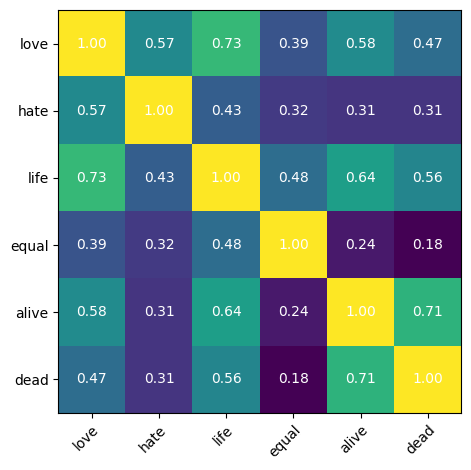

In [147]:
list_of_words = ['love', 'hate', 'life', 'equal', 'alive', 'dead']

similarity_matrix = np.zeros((len(list_of_words), len(list_of_words)), dtype=float)

### YOUR CODE HERE

def build_similarity_matrix(similarity_matrix, list_of_words):
    for i in range(len(list_of_words)):
        for j in range(len(list_of_words)):
            similarity_matrix[i, j] = glove_model.similarity(list_of_words[i], list_of_words[j])

    return similarity_matrix

plot_similarity_matrix(build_similarity_matrix(similarity_matrix, list_of_words), list_of_words)

### YOUR CODE ENDS HERE

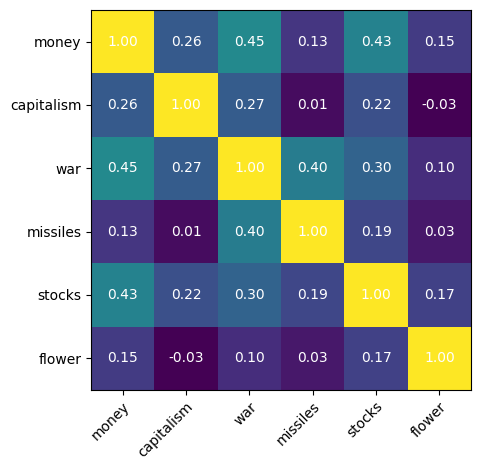

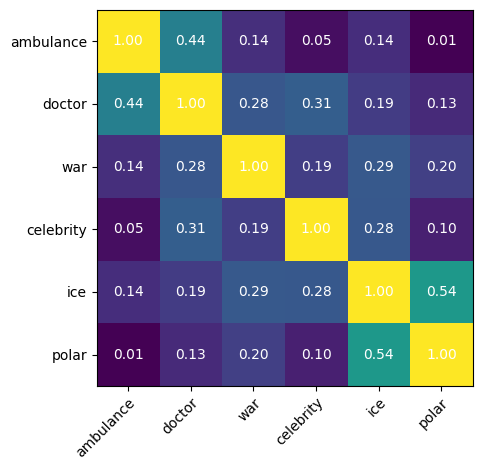

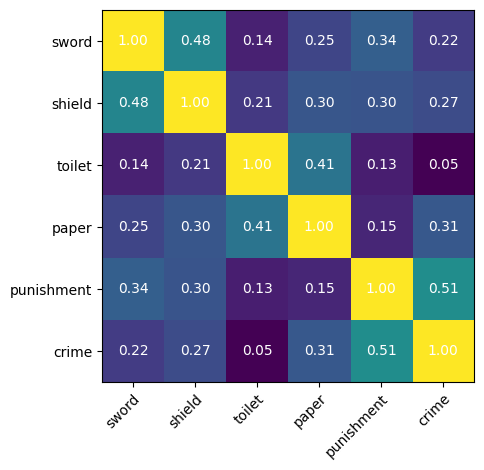

In [148]:
#### YOUR CODE HERE

list_of_words = ['money', 'capitalism', 'war', 'missiles', 'stocks', 'flower']
list_of_words_2 = ['ambulance', 'doctor', 'war', 'celebrity', 'ice', 'polar']
list_of_words_3 = ['sword', 'shield', 'toilet', 'paper', 'punishment', 'crime']

similarity_matrix = np.zeros((len(list_of_words), len(list_of_words)), dtype=float)


plot_similarity_matrix(build_similarity_matrix(similarity_matrix, list_of_words), list_of_words)
plot_similarity_matrix(build_similarity_matrix(similarity_matrix, list_of_words_2), list_of_words_2)
plot_similarity_matrix(build_similarity_matrix(similarity_matrix, list_of_words_3), list_of_words_3)

### YOUR CODE ENDS HERE

<a name='e11'></a>
### Exercise 11: Other pre-trained word embeddings
(10p) For this exercise, experiment with at least one different word embedding model. You can choose Glove with different dimensions or other pre-trained models. Use the gensim library to download and use the models.
Plot similarity matrices between sets of words you used in the previous exercise and compare the results. Are there noticeable differences? Why (not)?

In [149]:
#### YOUR CODE HERE
light_model = api.load("glove-twitter-100")
strong_model = api.load("glove-wiki-gigaword-200")
best_model = api.load("glove-wiki-gigaword-300")


In [150]:
def plot_similarity_matrix_adapted(matrix, labels, ax=None, title=None):
    """
    Displays a plot of the `matrix` with the given `labels`
    Optionally draws it on a given `ax` (for subplotting)
    """

    if ax is None:
        fig, ax = plt.subplots()

    im = ax.imshow(matrix)

    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_yticklabels(labels)

    for i in range(len(labels)):
        for j in range(len(labels)):
            ax.text(j, i, f'{matrix[i, j]:.2f}', ha="center", va="center", color="w")

    if title:
        ax.set_title(title)


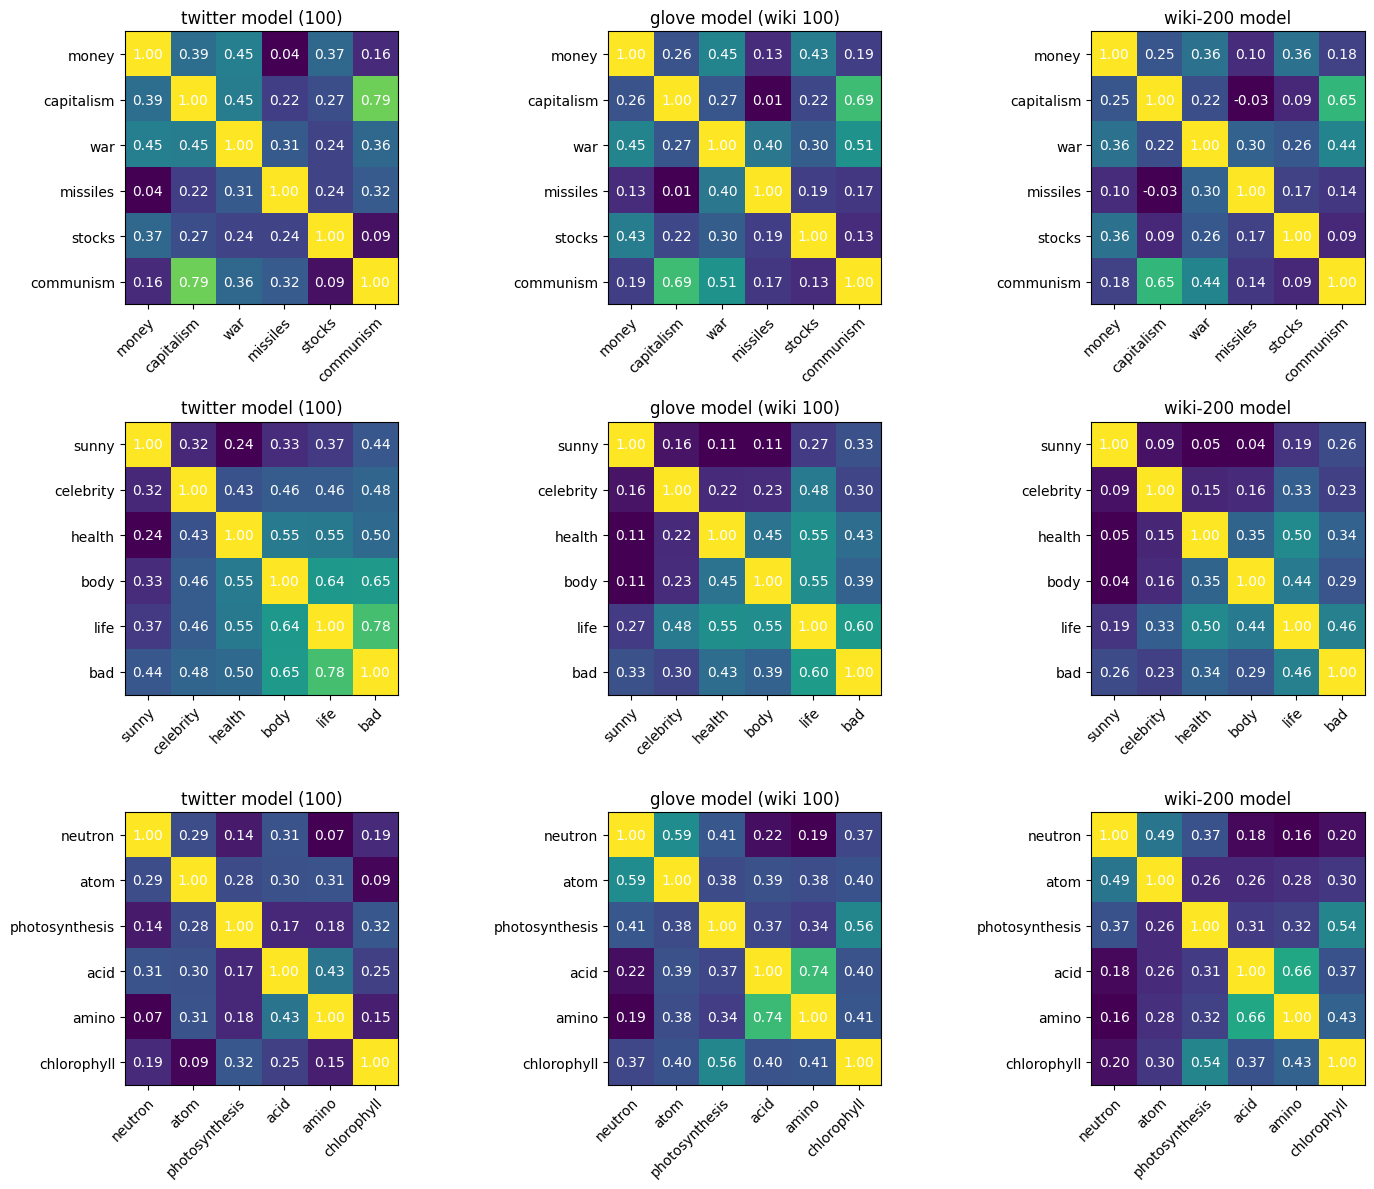

In [151]:
def build_similarity_matrix(model, list_of_words):
    size = len(list_of_words)
    similarity_matrix = np.zeros((size, size), dtype=float)

    for i in range(size):
        for j in range(size):
            similarity_matrix[i, j] = model.similarity(list_of_words[i], list_of_words[j])

    return similarity_matrix


list_of_words = ['money', 'capitalism', 'war', 'missiles', 'stocks', 'communism']
list_of_words_2 = ['sunny', 'celebrity', 'health', 'body', 'life', 'bad']
list_of_words_3 = ['neutron', 'atom', 'photosynthesis', 'acid', 'amino', 'chlorophyll']



models = [light_model, glove_model,strong_model]
model_names = ['twitter model (100)','glove model (wiki 100)','wiki-200 model']


selected_words = list_of_words
selected_words_2 = list_of_words_2
selected_words_3 = list_of_words_3

fig, axes = plt.subplots(3, len(models), figsize=(15, 12))

for row, word_list in enumerate([selected_words, selected_words_2, selected_words_3]):
    for col, model in enumerate(models):
        sim_matrix = build_similarity_matrix(model, word_list)
        plot_similarity_matrix_adapted(sim_matrix, word_list, ax=axes[row, col], title=model_names[col])

plt.tight_layout()
plt.show()

### YOUR CODE ENDS HERE

Across models 2 and 3, we observe that the models consistently capture similar types of word associations. This suggests that the core semantic structure is preserved, which is to be expected, as both models were trained on Wikipedia data. However, with an increase in dimensionality, cosine similarity values tend to decrease. Comparing the 100D (glove model) and 200D wiki-trained model, we see that most similarity scores are weaker in the higher-dimensional space. While speculative, this may be due to a larger vector space weakening strong and common word associations in order to better capture more nuanced and complex relationships.
Model 1 (the Twitter model) reflects some different kind of behavior, likely due to its training data. Words from list 2, such as 'sunny', 'celebrity', 'health', 'body', 'life', 'bad', show much stronger associations in the Twitter-based model than in the Wikipedia-trained ones, despite both models being 100D. This could be because such words frequently co-occur in informal or emotional contexts typical of tweets.
Conversely, scientific terms like those in list 3; 'neutron', 'atom', 'photosynthesis', 'acid', 'amino', 'chlorophyll', are more strongly associated in Wikipedia-trained models. For instance, 'amino' and 'acid' have a cosine similarity of 0.74 in the 100D wiki model, but only 0.43 in the Twitter model. This highlights how the training corpus influences word meaning where context shapes association.
However, without further investigation the conclusions above are, as mentioned, speculative.

## 5. Sentence Embeddings by Averaging Word Embeddings

Word embeddings are a powerful model for representing words and their meaning (in terms of distributional similarity). As we discussed in class, we can use them in a wide variety of tasks with more complex architectures. Word vectors offer a dense vector for each word. What if we wanted to represent a sentence (or a document) based on word vectors. How can we do that?

In the course, we will see different architectures that take into account the sequence of words (by combining their vectors). A first naive but simple and sometimes (as we are going to see) quite effective approach would be to represent a sentence with an embedding vector that is the average of the word vectors that form the sentence.

So formally, this is what we are aiming for:

$
\text{Sentence\_Embedding} = \frac{1}{N} \sum_{i=1}^{N} \text{Word\_Embedding}_i
$

where:
* $N$ is the number of words in a sentence
* $\text{Word\_Embedding}_i$ is the word vector for the $i$-th in the sentence.

Things to note:
* The embedding vector for the sentence will obviously have the same dimension as the word embedding.
* This representation ignores the word order (like bag-of-words). During the course we will see how we can overcome this limitation by using sequence models.

<a name='e12'></a>
### Exercise 12: Sentence Embedding

(10p) Complete the function below that takes as input the sentence in the form of tokens (so it's a list of words) and calculates the sentence embedding vector. First, we would need to retrieve the word embeddings for each word from our loaded model and then average the vectors.

Note: There can be cases where all tokens from a sentence are out-of-vocabulary words (OOV). Think what to do in this case and make sure to discuss it in the report.

In [152]:
def embed_sentence_word_model(tokens, model):
    """
    Calculates the sentence embedding by averaging the embeddings of the tokens
    Args:
        tokens: a list of words from the sentence
        model: a trained word embeddings model

    Returns: a numpy array of the sentence embedding

    """
    #### YOUR CODE HERE
    #### CAUTION: be sure to cover the case where all tokens are out-of-vocabulary!!!

    embeddings = []

    for token in tokens:
        if token in model:
            embeddings.append(model[token])

    if not embeddings:
        return np.zeros(model.vector_size, dtype=np.float32)

    sentence_embedding = np.mean(embeddings, axis=0).astype(np.float32)

    return sentence_embedding

    ### YOUR CODE ENDS HERE

Now we can apply the function to the whole dataset. Here we do it both for the sentence and the compressed version. You should know it by now, but this operation might take some time. The next cells will apply your function to the whole dataset.

In [153]:
def embed_sentence_word_model_dataset(example, model):
    """
    Embeds the sentence and the compressed sentence in the example from the Dataset
    Args:
        example: an example from the Dataset
        model: a trained word embeddings model

    Returns: updated example with 'sentence_embedding' and 'compressed_embedding' columns

    """
    sentence_tokens = example['sentence_tokens']
    clean_compressed = example['clean_compressed']
    compressed_tokens = tokenize(clean_compressed)

    sentence_embedding = embed_sentence_word_model(sentence_tokens, model)
    compressed_embedding = embed_sentence_word_model(compressed_tokens, model)

    example['sentence_embedding'] = sentence_embedding
    example['compressed_embedding'] = compressed_embedding
    return example

def embed_sentence_word_model_dataset_k(example, model, name):
    sentence_tokens = example['sentence_tokens']
    clean_compressed = example['clean_compressed']
    compressed_tokens = tokenize(clean_compressed)

    sentence_embedding = embed_sentence_word_model(sentence_tokens, model)
    compressed_embedding = embed_sentence_word_model(compressed_tokens, model)

    example[f'sentence_embedding_{name}'] = sentence_embedding
    example[f'compressed_embedding_{name}'] = compressed_embedding
    return example

In [154]:
# test_ds = test_ds.map(embed_sentence_word_model_dataset, fn_kwargs={'model': glove_model})
test_ds_2 = test_ds_2.map(embed_sentence_word_model_dataset, fn_kwargs={'model': glove_model})
print(test_ds)

Map: 100%|██████████| 36000/36000 [01:18<00:00, 460.79 examples/s] 

Dataset({
    features: ['set', 'clean_sentence', 'clean_compressed', 'sentence_tokens', 'compressed_tokens', 'sentence_bow', 'compressed_bow'],
    num_rows: 36000
})


In [155]:
for i in range(1):
    print(test_ds[i])

{'sentence_bow': array([0., 2., 1., ..., 0., 0., 0.]), 'compressed_bow': array([0., 0., 1., ..., 0., 0., 0.])}


Here you can see that the new dataset returned a single numpy array containing all sentence embeddings in our dataset. This is a lot more efficient than returning a list of arrays (which is the default behaviour). Below we check the type and the dimensionality.

We will be using `text` subset from our dataset to not use too much RAM.

In [156]:
sent_embedding = test_ds_2['sentence_embedding']
compr_embedding = test_ds_2['compressed_embedding']
print(type(sent_embedding))
print(sent_embedding.shape)
print(type(compr_embedding))
print(compr_embedding.shape)

<class 'numpy.ndarray'>
(36000, 100)
<class 'numpy.ndarray'>
(36000, 100)


Next we try the condensed representation based on a simple query. Feel free to try different queries with different words. What happens if we have OOV words in a query?

In [157]:
query = 'fox and deer'
print(query)

query_embedding = embed_text(query, clean, tokenize, lambda x: embed_sentence_word_model(x, glove_model))
print(query_embedding.shape)
print(query_embedding)

fox and deer
(100,)
[-0.083385   -0.63718998  0.25407499 -0.65408501 -0.1245815  -0.57695001
  0.1151895   0.47937998 -0.05304    -1.16922    -0.47926501 -0.117604
  0.67665502 -0.2181845   0.86132002  0.46395002  0.149115    0.35227501
 -0.00642499  0.42123    -0.108593    0.51330999  0.1666895  -0.19212
  0.55262502  0.777605   -0.17123    -0.00441501 -0.62225     0.180445
  0.263865    0.50187398  0.22722     0.50475501  0.49652     0.29570999
 -0.273479    0.18670499  0.66160999  0.42644    -0.10568     0.00512
 -0.715195    0.4271345  -0.198997    0.007035    0.21715499 -0.27086499
 -0.20389499 -0.205845   -0.84727499 -0.37044501  0.102978    0.56117
 -0.4170775  -1.50663996 -0.1817145   0.17064501  0.52860501  0.030635
  0.0378895   0.82403001  0.55395999 -0.18147999  1.25700003  0.539876
  0.069414   -0.21291    -0.002545    1.04204997 -0.26154    -0.20421065
 -0.1738185  -0.096082   -0.149541   -0.209345   -0.749255    0.13118099
 -0.77420002  0.45635499  0.25060001 -0.2636805 

<a name='e13'></a>
### Exercise 13: Analyze sentence embeddings
- (5p) Calculate similarity between the word embeddings representations of the selected queries and the dataset sentences.
- (5p) Analyze the search results. Does the search work as expected? Discuss the results.
- (5p) Compare the results with the ones you got with the bag-of-words and TF-IDF representation. Discuss the differences and similarities.

In [158]:
### YOUR CODE HERE
similarity = cosine_similarity_1_to_n(query_embedding, sent_embedding)

# print top 10 similarities and the sentences
top_indices = top_k_indices(similarity, k=10).tolist()
for idx in top_indices:
    print(f'similarity: {similarity[idx]}; sentence: {test_ds_2["sentence_tokens"][idx]}')

### YOUR CODE ENDS HERE

similarity: 0.5894502253642233; sentence: ['A', 'brave', 'Jack', 'Russell', 'dog', 'fought', 'off', 'a', 'mountain', 'lion', 'prowling', 'on', 'his', 'owner', 'farm']
similarity: 0.5725632879009809; sentence: ['The', 'Minnesota', 'Department', 'of', 'Natural', 'Resources', 'reminds', 'hunters', 'that', 'Chippewa', 'tribal', 'lands', 'are', 'closed', 'to', 'wolf', 'hunting']
similarity: 0.5637650735370265; sentence: ['A', 'miniature', 'donkey', 'named', 'Eddie', 'died', 'of', 'rabies', 'last', 'week', 'on', 'a', 'Durham', 'County', 'goat', 'farm']
similarity: 0.5622798010117159; sentence: ['What', 'time', 'of', 'the', 'day', 'is', 'best', 'for', 'hunting', 'deer', 'during', 'a', 'full', 'moon', '?']
similarity: 0.5581559344290921; sentence: ['A', 'grizzly', 'bear', 'suspected', 'of', 'preying', 'on', 'cattle', 'near', 'Cody', 'has', 'been', 'relocated']
similarity: 0.5537907951688963; sentence: ['On', 'Friday', 'high', 'school', 'students', 'from', 'Eveleth', 'Gilbert', 'spent', 'the', 

similarity: 0.5894502253642233; sentence: ['A', 'brave', 'Jack', 'Russell', 'dog', 'fought', 'off', 'a', 'mountain', 'lion', 'prowling', 'on', 'his', 'owner', 'farm']

similarity: 0.5622798010117159; sentence: ['What', 'time', 'of', 'the', 'day', 'is', 'best', 'for', 'hunting', 'deer', 'during', 'a', 'full', 'moon', '?']

3. The 3rd most similar senetnce desnt ever mention word dear or fox, instead they mention thrir attributes which the wordembeding deemed similar to the query words themselves.
similarity: 0.6209997096493328; sentence: ['Scientists', 'said', 'mapped', 'genetic', 'makeup', 'platypus', 'one', 'nature', 'strangest', 'animals', 'bill', 'like', 'duck', 'mammal', 'fur', 'snake', 'like', 'venom']
This is in direct contrast to TF-IDF where the results have been all about mentioning the word explictly such that its importance doesnt get diluted in the wave of other related but not same words, which created teh case of relience on these key words. Senetence embedins with context break free of this concept.  Here the realted words play a crucial role in determing similarity, allowing the afortementioned senetcnce so high in the rankings of similarity, without mentioning any of the key words.

2. These fidnings are however expecetd given the role of glove model, which tries to campture global meaning and realtions. In fact looking for those hiden features in the senetcne and its context helps the model determine with greated level of confidence the similarity of 2 senetnces, in the TF-iDF case it has only been around ~0.4, and here its ~0.65.


## 6. Evaluating Retrieval

In this last section we will try to evaluate how good our sentence retrieval system is. To keep the computational resources manageable, we will use the test set for that as its size is more manageable.

Recall from the lecture in IR that there are several metrics to evaluate retrieval performance by taking into account the relevance of the retrieved results to the query. We will use Recall@K here (for more metrics and more details refer to the lecture slides and the textbooks).

RRecall@K is a metric used to measure the effectiveness of a search system in retrieving relevant documents within the top $K$ retrieved documents. It calculates the proportion of relevant documents retrieved within the top-$K$ results, compared to the total number of relevant documents in the collection.

$
\text{Recall@K} = \frac{\text{Number of relevant documents retrieved in the top }-K}{\text{Total number of relevant documents}}
$

In our case, we have a sentence, and it's compressed version. To test our system, we will treat compressed sentences as the queries. Each query will have only a single relevant sentence - the corresponding uncompressed sentence.

Therefore, for the calculation of Recall@K we will take into account whether the correct retrieved result is contained within the first $K$ retrieved results. For example, if for a query (i.e. a compressed sentence) we retrieve 10 results and within these we see the relevant one (i.e. the full sentence), then Recall@10 = 1.

<a name='e14'></a>
### Exercise 14: Cosine similarity between two sets of vectors

(3p) In this exercise you will revisit your implementation of the cosine similarity. Generalize it so that it can accept two arrays containing two sets of vectors (first one containing $M$ vectors and the second one $N$ vectors). Compute the cosine similarity between each pair of vectors coming from the two sets. The result should be an array of size $M x N$.

Once again, try to write an efficient code. This means no loops. Remember the relation between matrix multiplication and dot product. (Depending on your implementation of the previous function calculating cosine similarity, this one can be almost the same)

In [70]:
def cosine_similarity_m_to_n(vectors, other_vectors):
    """
    Calculates the cosine similarity between a multiple vectors and other vectors.
    Args:
        vectors: a numpy array representing M number of vectors of D dimensions (of the size MxD)
        other_vectors: a 2D numpy array representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a numpy array of cosine similarity between all the vectors and all the other vectors

    """

    #### YOUR CODE HERE
    
    matrix_multiplication = vectors @ other_vectors.T
    norms = np.linalg.norm(vectors, axis=1)[:, np.newaxis] * np.linalg.norm(other_vectors, axis=1)
    return matrix_multiplication / (norms+1e-10) # divide by 0 error

    ### YOUR CODE ENDS HERE

The following function will use your implementation to calculate Recall@K based on the similarity matrix.

In [71]:
def calculate_recall(queries, sentences, k, batch_size=1000):
    """
    Calculates recall@k given the embeddings of the queries and sentences.
    Assumes that only a single sentence with the same index as query is relevant.
    Batching is implemented to avoid high memory usage.
    Args:
        queries: a numpy array with the embeddings of N queries
        sentences: a numpy array with the embeddings of N sentences available for retrieval
        k: number of top results to search for the relevant sentence
        batch_size: number of queries to process at a time

    Returns: calculated recall@k

    """
    n_queries = queries.shape[0]
    correct = np.zeros(n_queries, dtype=bool)

    with tqdm.tqdm(total=n_queries) as pbar:
        for batch_start in range(0, n_queries, batch_size):
            batch_end = min(batch_start + batch_size, n_queries)
            queries_batch = queries[batch_start:batch_end]
            batch_similarity = cosine_similarity_m_to_n(queries_batch, sentences)

            for i, similarity_row in enumerate(batch_similarity):
                query_index = batch_start + i
                top_k = top_k_indices(similarity_row, k=k, sorted=False)

                if query_index in top_k:
                    correct[query_index] = True

                pbar.update(1)

    recall = np.sum(correct) / n_queries
    return recall

You can use it like so:

In [72]:
recall_at_1 = calculate_recall(compr_embedding, sent_embedding, k=1, batch_size=1000)
print(f'\n{recall_at_1 * 100:.2f}%')

100%|██████████| 36000/36000 [00:14<00:00, 2549.70it/s]


31.67%


<a name='e15'></a>
### Exercise 15: Evaluating retrieval methods

(10p) Calculate recall for different values of $K$ for all methods:
- BOW,
- TF-IDF,
- Pre-trained embeddings.

Discuss the results.
Comment on how recall changes based on the value of $K$. Are the results expected or surprising?

In [73]:
compr_embedding
sent_embedding
test_ds_2 = test_ds_2.map(embed_sentence_word_model_dataset_k, fn_kwargs={'model': best_model, 'name': 'BIG'})

sentence_bow = test_ds_2['sentence_bow']
compressed_bow = test_ds_2['compressed_bow']
sentence_tfidf = test_ds_2['sentence_tfidf']
compressed_tfidf = test_ds_2['compressed_tfidf']

Map: 100%|██████████| 36000/36000 [00:44<00:00, 801.46 examples/s] 


In [74]:
sentence_emb_big = test_ds_2['sentence_embedding_BIG']
compressed_emb_big = test_ds_2['compressed_embedding_BIG']

sentence_bow[1].shape, sentence_tfidf[1].shape , sent_embedding[1].shape, sentence_emb_big[1].shape

((10000,), (10000,), (100,), (300,))

In [75]:
#### YOUR CODE HERE
# check 3 models and 5 different k values - 1 3 5 7 10
k_values = [1, 3, 7]
models = [('sentence_bow', 'compressed_bow'), ("sentence_tfidf",'compressed_tfidf'),('sentence_embedding','compressed_embedding'), ('sentence_embedding_BIG','compressed_embedding_BIG')] # columns


recalls_2 = np.zeros((len(models), len(k_values)), dtype=float)
for j, k in enumerate(k_values):
    recalls_2[0, j] = calculate_recall(compressed_bow, sentence_bow, k=k)
    recalls_2[1, j] = calculate_recall(compressed_tfidf,sentence_tfidf, k=k)
    recalls_2[2, j] = calculate_recall(compr_embedding, sent_embedding, k=k)
    recalls_2[3, j] = calculate_recall(compressed_emb_big, sentence_emb_big, k=k)
        
### YOUR CODE ENDS HERE

100%|██████████| 36000/36000 [00:19<00:00, 1812.22it/s]


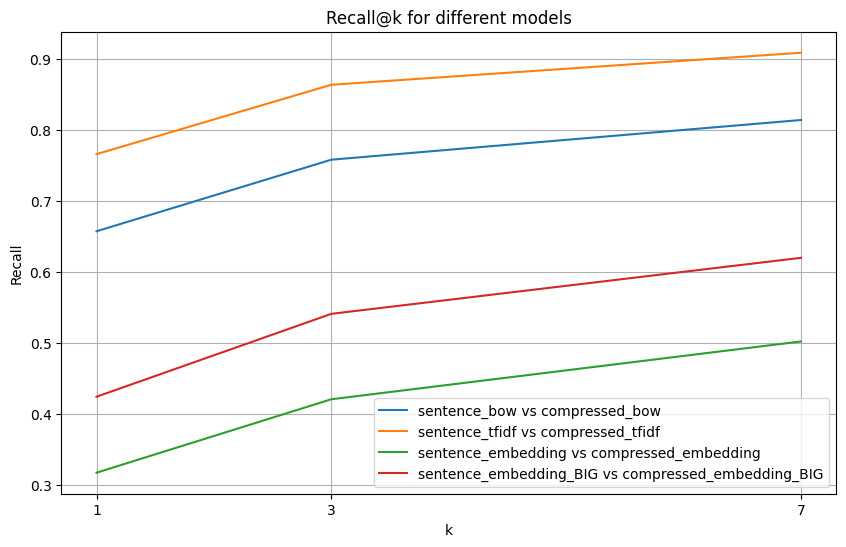

In [76]:
fig, ax = plt.subplots(figsize=(10, 6))
for i, (sentence_col, compressed_col) in enumerate(models):
    ax.plot(k_values, recalls_2[i], label=f'{sentence_col} vs {compressed_col}')
    ax.set_xticks(k_values)
    ax.set_xticklabels(k_values)
    ax.set_xlabel('k')
    ax.set_ylabel('Recall')
    ax.set_title('Recall@k for different models')
    ax.legend()
plt.grid()
plt.show()

AS expecetd the values of recal increase with K, this is due to the fact that we look at more results, and hence the number of matches should increase, unless the model's performance is convering to maximum the the value increase wouldnt be so drastic.

The interesting part is the performance of GloVo models being significantly worse at the task recalling very similar senetnces. Due to fcosuing on relations and context they might find other senetences more ismilar to the condensed encoding. While tf_idf and BOW apporach lean more heavily on the exactness of the 2 sentences

<a name='e16'></a>
### Exercise 16: Improving retrieval

(10p) Imagine that you work at a company and are tasked with delivering the best retrieval method. Select the most promising one and try to improve the scores (e.g. by changing the vocab size, loading different model, etc.).
Discuss the results you achieve, even if you didn't manage to improve the scores.

Since TF-iDF works best (in line with what you guys said during lecture) I Shall try to improve it, lets try imncreasing the vocab to different values and see the results for each. For the sake of consistency lets assume K=3 for our recall score the starting point is ~0.86 

In [79]:
recalls_2[1][1]

0.8631111111111112

In [87]:
import gc
from collections import Counter
#### YOUR CODE HERE

def bag_of_words_dataset_3(example, token_to_id_3, name):
    sentence_tokens = example['sentence_tokens']
    compressed_tokens = example['compressed_tokens']

    sentence_bow = bag_of_words(sentence_tokens, token_to_id_3)
    compressed_bow = bag_of_words(compressed_tokens, token_to_id_3)

    example[f'sentence_bow_{name}'] = sentence_bow
    example[f'compressed_bow_{name}'] = compressed_bow
    return example

def TFIDF_dataset_3(example, name, idf_i):
    sentence_bow = example[f'sentence_bow_{name}']
    compressed_bow = example[f'compressed_bow_{name}']

    sentence_tfidf = sentence_bow * idf_i
    compressed_tfidf = compressed_bow * idf_i

    example[f'sentence_tfidf_{name}'] = sentence_tfidf
    example[f'compressed_tfidf_{name}'] = compressed_tfidf
    return example

def calculate_idf(bows):
    if isinstance(bows, list):
        bows = np.array(bows)
        
    N = bows.shape[0]
    df = np.count_nonzero(bows > 0, axis=0)
    idf = np.log(N /(df+1)) # df+1 divide by 0 issues)

    return idf

# idf = calculate_idf(sentences_bows)


vocab_size = [10_000, 20_000, 30_000, 40_000]
vocab_counter_2 = extract_vocabulary_counts(tokenized_sentences_2 + tokenized_compressed_2)
vocabs = [vocab_counter_2.most_common(vocab_size[i]) for i in range(len(vocab_size))]
token_to_ids = [{word: i for i, (word, _) in enumerate(vocab)} for vocab in vocabs]

test_ds_3 = split_ds_2['test'].select_columns(['sentence_tokens', 'compressed_tokens'])
recalls_3 = np.zeros(len(vocab_size), dtype=float)

for i in range(len(vocab_size)):
    # Process in smaller batches to save memory
    bows = test_ds_3.map(
        bag_of_words_dataset_3, 
        fn_kwargs={'token_to_id_3': token_to_ids[i], 'name': i}
    )
    # Calculate IDF
    idf_i = calculate_idf(bows[f'sentence_bow_{i}'])
    
    # Apply TF-IDF transformation
    tfidf_ds = bows.map(
        TFIDF_dataset_3, 
        fn_kwargs={'name': i, 'idf_i': idf_i}
    )
    
    compressed_tfidf = np.array(tfidf_ds[f'compressed_tfidf_{i}'])
    sentence_tfidf = np.array(tfidf_ds[f'sentence_tfidf_{i}'])
    
    # Calculate recall and store result
    recalls_3[i] = calculate_recall(
        compressed_tfidf, 
        sentence_tfidf, 
        k=3
    )
    # Clean up to free memory
    del bows, tfidf_ds, idf_i, compressed_tfidf, sentence_tfidf
    
    # Force garbage collection
    gc.collect()
    
    print(f"Completed vocab size {vocab_size[i]}: Recall@3 = {recalls_3[i]}")

test_ds_3



100%|██████████| 36000/36000 [02:05<00:00, 287.98it/s]


Completed vocab size 10000: Recall@3 = 0.8504722222222222


100%|██████████| 36000/36000 [04:27<00:00, 134.80it/s]


Completed vocab size 20000: Recall@3 = 0.9031111111111111


100%|██████████| 36000/36000 [06:38<00:00, 90.40it/s] 


Completed vocab size 30000: Recall@3 = 0.9190555555555555


100%|██████████| 36000/36000 [09:02<00:00, 66.31it/s]

Completed vocab size 40000: Recall@3 = 0.92825


Dataset({
    features: ['sentence_tokens', 'compressed_tokens'],
    num_rows: 36000
})

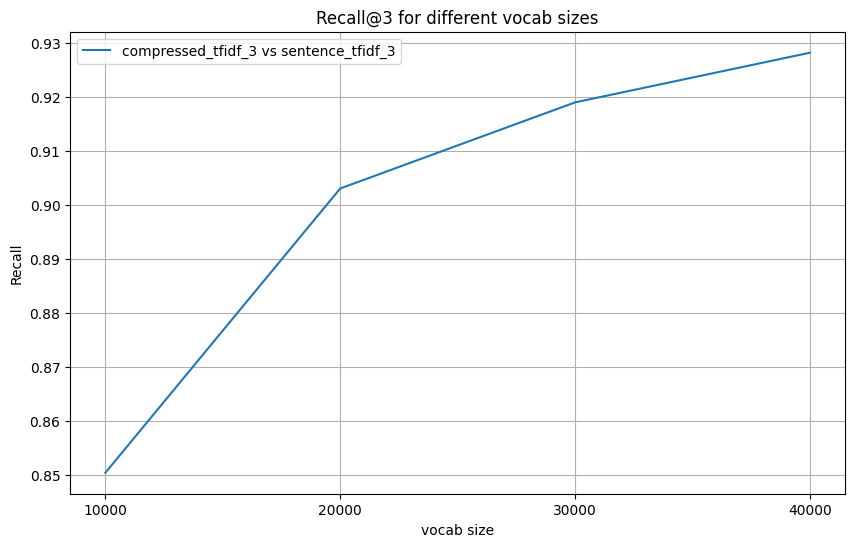

In [88]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(vocab_size, recalls_3, label=f'compressed_tfidf_{i} vs sentence_tfidf_{i}')
ax.set_xticks(vocab_size)
ax.set_xticklabels(vocab_size)
ax.set_xlabel('vocab size')
ax.set_ylabel('Recall')
ax.set_title('Recall@3 for different vocab sizes')
ax.legend()
plt.grid()
plt.show()
### YOUR CODE ENDS HERE

As a result of increasing the Vocab size for the best performing model, we can see further increase. This might be due to the fact that the larger vocabulary captures more neuanced words, which are important to specific query, combined with how IDF values further promote importance of such rare words, we can acheive better values of recall, even for small window of K = 3.

I worth mentioning tho the cost of such operations, increasing vacab size to 40_000 makes memory a huge issue. Storying 36_000 rows of 40_000 long vectors is a lot of bytes - or rather giga bytes. This is in stark contrast to sentence embeddings approach where we only store 100-500 dimenional vectors, making it ~100 times less memory intensive. This approach however, as shown in ex 15, performs significantly worse on this task of matching compressed querries to original sentence.

That being said there are clear signs of converging in recall value as we increase vocab size, hence it would be beneficial to pick 20_000 as a trade-off between computational, memory cost and model performance

// your comments